# No exponential Magic

### Learning Outcomes

<li> Explain why quantum superposition does not automatically imply exponential speedups

<li> Write a uniform superposition over multiple qubits as a tensor product.

Author: [Monit Sharma](https://github.com/MonitSharma)
LinkedIn: [Monit Sharma](https://www.linkedin.com/in/monitsharma/)
Twitter: [@MonitSharma1729](https://twitter.com/MonitSharma1729)
Medium : [MonitSharma](https://medium.com/@_monitsharma)

Classical computers run on binary digits , or bits, which can either be $0$ and $1$ but **not both**.

----

Suppose we have a combination lock with bits rather than digits in its combination. As the number of bits, $n$ increases, the number of possible combinations grows exponentially as $2^n$. 

-----

If you want to break the lock by trial and error, it will take you a very long time!



![](https://codebook.xanadu.ai/pics/lock.svg)

To give a sense of how long, let's take the world's most powerful **supercomputer** for simulating protien folding. This can perform about $10^{16}$ floating point operations per second, which is about twice the processing power of Fugaku(the world's most powerful individua;l supercomputer).


------

Let's assume it can check a single combination with each operation. For a $100$-bit lock , there are $2^{100} \approx 10^{30}$ combinations and our supercomputer will need around

$$ \frac{2^{100}}{10^{16}} \approx 4 \text{ million years } $$

to break it by brute force.

Quantum computers use qubits, which are like regular bits except that they can be in a superposition of quantum states $|0⟩$ and $|1⟩$

$$ |\psi⟩ = \alpha |0⟩ + β|1⟩ $$


------

This suggests the following scheme for breaking the $n$ bit lock with a quantum computer, take $n$ qubits and put each into an even superposition

$$|+⟩ = \frac{1}{\sqrt{2}} (|0⟩ + |1⟩) $$

The total state of the system will be an even superposition over every $n$ bit string $\mathbb{x} \in \{0,1\}^n$

$$|\psi⟩ = |+⟩ \otimes |+⟩ ⊗ ..... ⊗ |+⟩$$

$$  = |+⟩^{\otimes n}$$

$$ = \frac{1}{\sqrt{2^n}} \sum_{x\in \{0,1\}^n} |x⟩$$


where $\otimes$ indicates the tensor product . Note that when we take tensor products of basis states, we will usually omit the tensor product symbol, so for instance $|0⟩ \otimes |1⟩ = |01⟩$ 


A uniform superposition will include string $|s⟩$, But by itself, it doesn't help us break the lock, since the superposition includes everything else as well!

-----

Once we open the quantum computer and look inside, we may observe the correct lock combination, but we might also see an incorrect combination, due to probabilistic nature of quantum computation.


![](https://codebook.xanadu.ai/pics/peril.svg)


We still have only 50% chance on landing on the correct answer when the computation finishes. More generally , if we start with an even superposition of $n$ bits, our chance of observing the correct answer is $1/2^n$. These are the same odds as a random *classical* guess.

----

** A quantum superposition may look like it can result in an exponential number of things being done at once, but once we take a measurement, we will only get a random snapshot of what it's done.

### Code Exercise

![](https://codebook.xanadu.ai/pics/uniform.svg)

### Codercise A.1.1

Fill in the following code to create the uniform superposition over $n$ qubits. It will plot the probability of observing different outcomes

In [1]:
%pip install pennylane

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 48.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 55.0 MB/s eta 0:00:00


In [2]:
import pennylane as qml
import numpy as np

In [3]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def naive_circuit():
    """Create a uniform superposition and return the probabilities.

    Returns: 
        array[float]: Probabilities for observing different outcomes.
    """
    for wire in range(n_bits):
        qml.Hadamard(wires=wire)

        ##################
        # YOUR CODE HERE #



        #pass # REPLACE PASS

    return qml.probs(wires=range(n_bits))


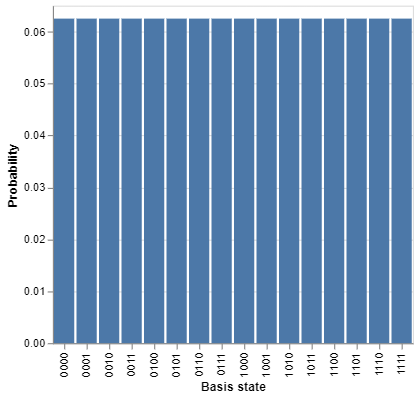

The uniform superposition certainly includes the state $|s⟩$ , but it includes everything else as well! The probability distribution tells us the chance of observing a particular computational basis state when we measure the circuit. Our chances of finding the solution using this circuit are therefore no better than a random guess! We need to do something more.